<a href="https://colab.research.google.com/github/devinath9/Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [8]:
#data=pd.read_csv('/content/DATA1.csv')
true = pd.read_csv("/content/True.csv")
fake = pd.read_csv("/content/Fake.csv")
dct={}

In [9]:
# Add flag to track fake and real
fake['label'] = 'fake'
true['label'] = 'true'

In [10]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [12]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.drop(["title","subject","date"],axis=1,inplace=True)
data.head()

,text,label
0,The women of Fox News are sick and tired of pu...,fake
1,SYDNEY (Reuters) - Australia s high court on T...,true
2,Nothing is off-limits for Leslie Jones stand-...,fake
3,The following statements were posted to the ve...,true
4,Jim Comey gets a 10 year tenure as FBI directo...,fake


In [14]:
import string

def punctuation_remover(txt):
    lst = [char for char in txt if char not in string.punctuation]
    after_removing = ''.join(lst)
    return after_removing

data['text'] = data['text'].apply(punctuation_remover)

data.head()

,text,label
0,The women of Fox News are sick and tired of pu...,fake
1,SYDNEY Reuters Australia s high court on Tues...,true
2,Nothing is offlimits for Leslie Jones standup...,fake
3,The following statements were posted to the ve...,true
4,Jim Comey gets a 10 year tenure as FBI directo...,fake


In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop = sw.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
0,The women Fox News sick tired putting sexist b...,fake
1,SYDNEY Reuters Australia high court Tuesday be...,true
2,Nothing offlimits Leslie Jones standup routine...,fake
3,The following statements posted verified Twitt...,true
4,Jim Comey gets 10 year tenure FBI director Oba...,fake


In [16]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=42)

In [18]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.55%


Confusion matrix, without normalization


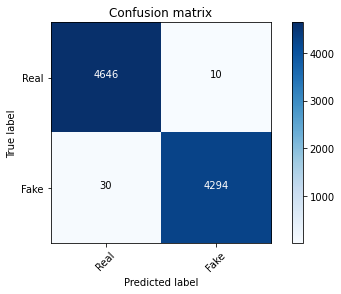

In [19]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [20]:
# Logistic regression

# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.85%


Confusion matrix, without normalization


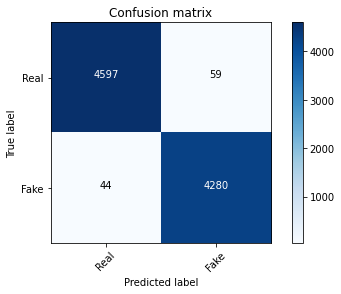

In [21]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', PassiveAggressiveClassifier())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['PassiveAggressiveClassifier'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.63%


Confusion matrix, without normalization


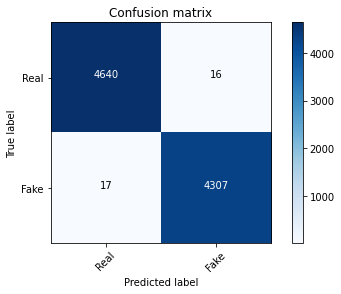

In [23]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [24]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.88%


Confusion matrix, without normalization


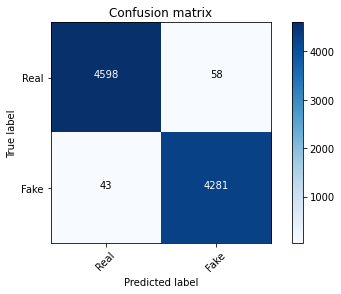

In [25]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [26]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 94.0%


Confusion matrix, without normalization


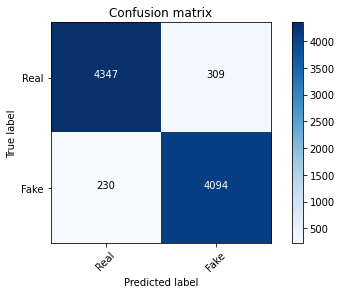

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

In [28]:
#SVM

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.55%


Confusion matrix, without normalization


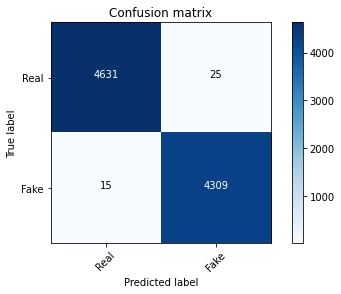

In [29]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Real', 'Fake'])

([<matplotlib.axis.YTick at 0x7fca6b421810>,
 <a list of 11 Text major ticklabel objects>)

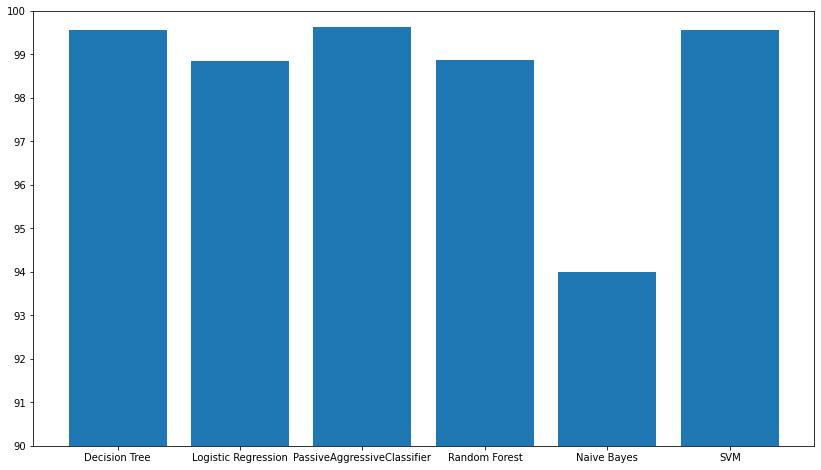

In [30]:
plt.figure(figsize=(14,8))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((90,91,92,93,94,95,96,97,98,99,100))